# Dependencias

In [1]:
import seaborn as sns
from sentence_transformers import SentenceTransformer
sns.set_theme()
import sys
import os
ruta_carpeta = os.path.abspath('../src')
if ruta_carpeta not in sys.path:
    sys.path.append(ruta_carpeta)
import utileria as ut
from Graficos import graficos
from limpieza import limpieza_regex 
import pandas as pd 

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\bcriv\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!



# lectura de los datos

In [2]:
datos = pd.read_excel('../input/paper1.xlsx')

In [3]:
datos = datos[['Agradecemos cualquier sugerencia o comentario que pueda dejarnos. Use este espacio para registrarlo. Muchas gracias por participar (opcional)']]

In [4]:
datos.columns = ['Comentarios']

In [5]:
datos['Comentarios'] = limpieza_regex.limpieza_de_textos(list(datos['Comentarios']))

In [6]:
datos.shape

(1296, 1)

In [7]:
patron = r'^(?:nada|ninguno|ninguna|na|n\.a|n|no|\.{1,3}|\-|:|\?|nqda|na\s*)$'

In [8]:
datos_use = datos.loc[~datos['Comentarios'].str.match(patron, na=False)]
datos_use = datos_use.dropna()

# eliminar string vacio y nan
datos_use = datos_use[datos_use['Comentarios'] != '']
datos_use = datos_use[datos_use['Comentarios'] != 'nan']
datos_use

,Comentarios
0,ningun comentario
1,no gracias
4,me parece que es una solucion a movilidad pare...
5,mayor informacion sobre la viabilidad de este ...
8,en paises en vias de desarrollo existe las com...
...,...
1269,pienso que al igual que un vuelo comercial un ...
1283,me parece una propuesta interesante y que chev...
1287,seria bueno tener en cuenta la malla vial para...
1289,oki


# Nubes de Palabras

In [9]:
with open('../input/palabras_vacias.txt', 'r') as file:
    data = file.read().splitlines()

# cercania semantica 

In [10]:
textos = list(filter(None,list(datos_use['Comentarios'].values)))
textos

['ningun comentario',
 'no gracias',
 'me parece que es una solucion a movilidad parecida a querer matar una mosca con un cañon un sistema eficiente de movilidad ya ha sido inventado y se llama tren bien sea un metro o una red ferroviaria eficiente',
 'mayor informacion sobre la viabilidad de este posible servicio',
 'en paises en vias de desarrollo existe las complicaciones asociadas a los tendidos y redes de cableado electrico telefonico etc lo que aumentaria el riesgo de accidentes',
 'gracias',
 'la implementacion es buena sin embargo se debe realizar con muchas regulacion para no exponer o poner en riesgo la calidad vida de las comunidades',
 'importantes los estudios de impacto ambiental y planes de manejo para el licenciamiento de esta actividad',
 'siento que puede ser mas efectivo si se tuviese mayo informacion sobre el manejo de este',
 'ningun comentario',
 'nada en particular',
 'no tengo sugerencias',
 'ampliar la opcion a trabajar y estudiar preguntaria por los ingresos d

In [11]:
model = SentenceTransformer('hackathon-pln-es/paraphrase-spanish-distilroberta')
modelos = ut.sentence_similarity(model,textos,0.95)

print(len(modelos.varianza_explicada()))

84


c:\Users\bcriv\miniconda3\envs\dydde\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\bcriv\miniconda3\envs\dydde\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\bcriv\miniconda3\envs\dydde\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\bcriv\miniconda3\envs\dydde\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning:

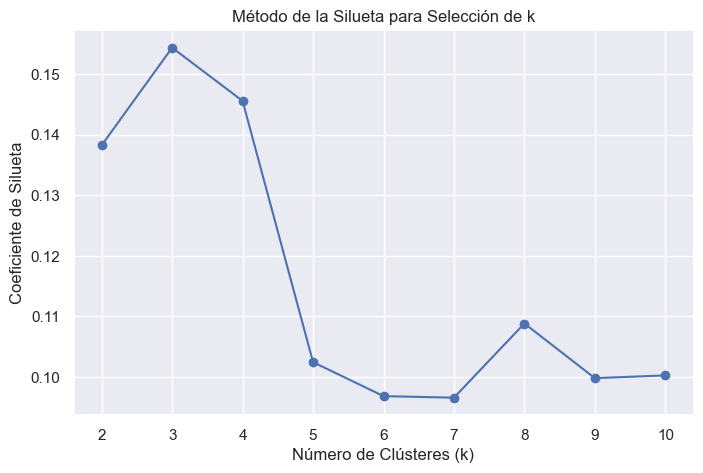

In [12]:
modelos.silhouette_method()

In [13]:
cluster = modelos.k_means(3)
len(cluster.labels_)

c:\Users\bcriv\miniconda3\envs\dydde\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


212

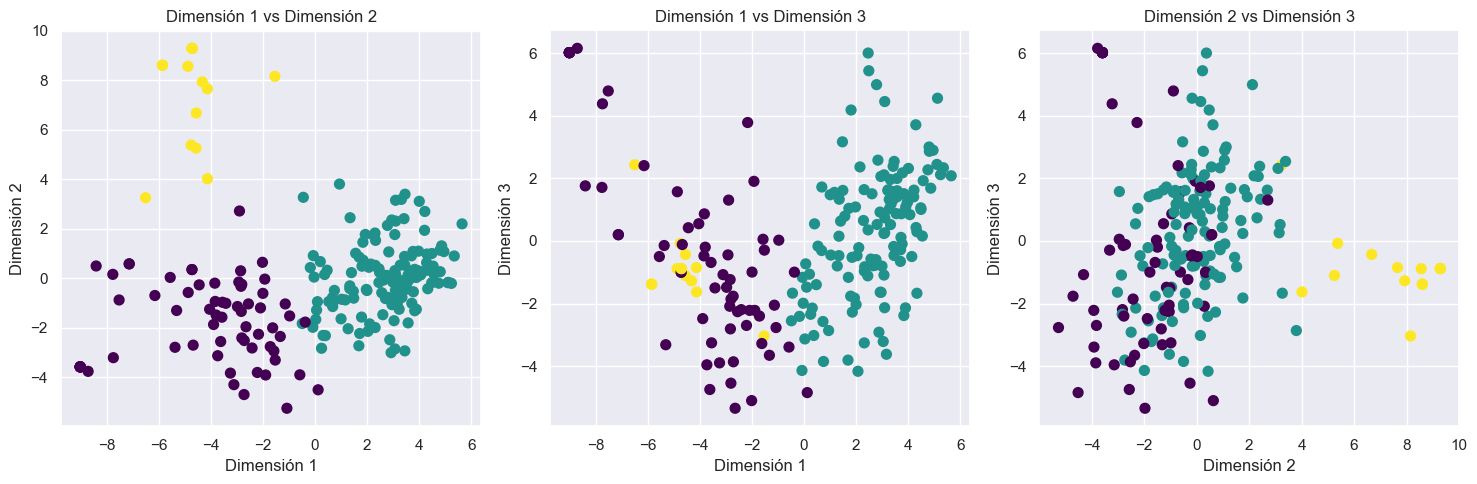

In [14]:
graficos.plot_column_combinations(modelos.componentes(),3, cluster.labels_)

In [15]:
data_use = datos_use.loc[datos_use['Comentarios']!= '']
data_use['grupo'] = cluster.labels_

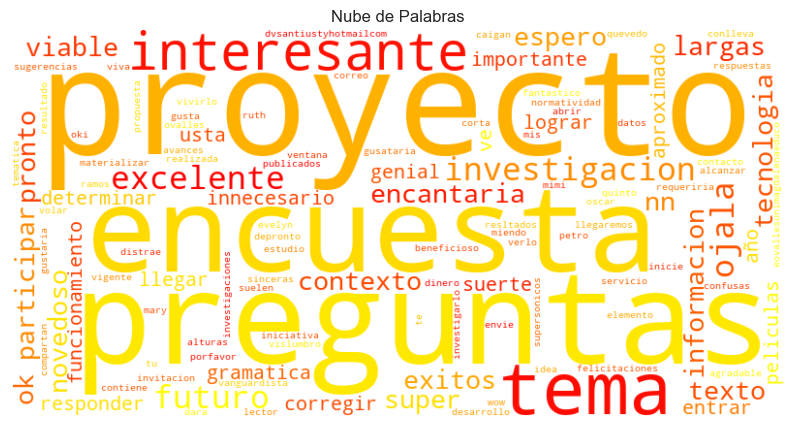

In [16]:
graficos.generar_wordcloud(limpieza_regex.stop_words(data,data_use[data_use['grupo']==0]['Comentarios']),"autumn")

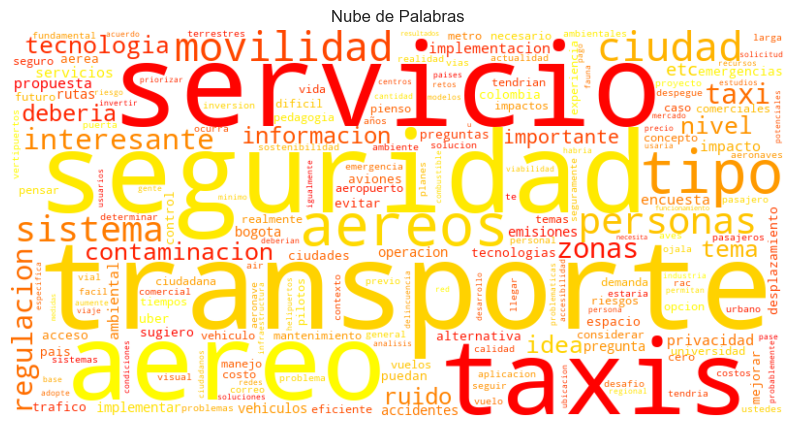

In [17]:
graficos.generar_wordcloud(limpieza_regex.stop_words(data,data_use[data_use['grupo']==1]['Comentarios']),"autumn")

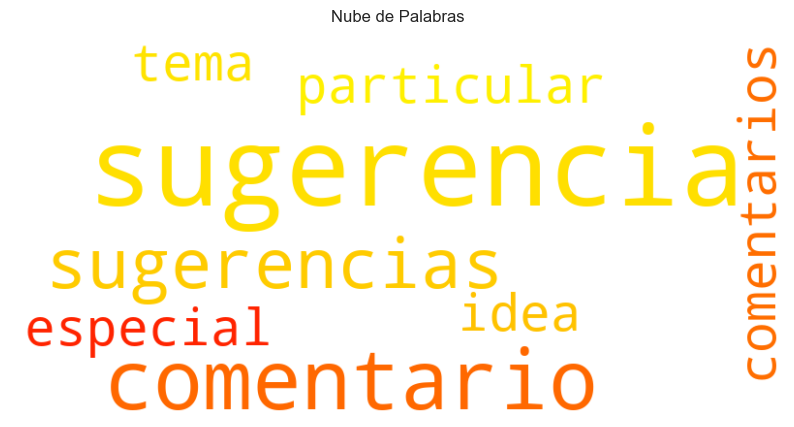

In [18]:
graficos.generar_wordcloud(limpieza_regex.stop_words(data,data_use[data_use['grupo']==2]['Comentarios']),"autumn")

In [ ]:
datos_gru_1 = data_use[data_use['grupo'] == 1]
datos_gru_1 = datos_gru_1.drop(columns=['grupo'])
datos_gru_1

,Comentarios
4,me parece que es una solucion a movilidad pare...
5,mayor informacion sobre la viabilidad de este ...
8,en paises en vias de desarrollo existe las com...
10,la implementacion es buena sin embargo se debe...
11,importantes los estudios de impacto ambiental ...
...,...
1268,me encanta ver que la santo tomas este lideran...
1269,pienso que al igual que un vuelo comercial un ...
1283,me parece una propuesta interesante y que chev...
1287,seria bueno tener en cuenta la malla vial para...


In [38]:
model = SentenceTransformer('hackathon-pln-es/paraphrase-spanish-distilroberta')
modelos = ut.sentence_similarity(model,datos_gru_1['Comentarios'].values.tolist(),0.95)

print(len(modelos.varianza_explicada()))

68


c:\Users\bcriv\miniconda3\envs\dydde\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


c:\Users\bcriv\miniconda3\envs\dydde\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\bcriv\miniconda3\envs\dydde\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\bcriv\miniconda3\envs\dydde\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\bcriv\miniconda3\envs\dydde\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning:

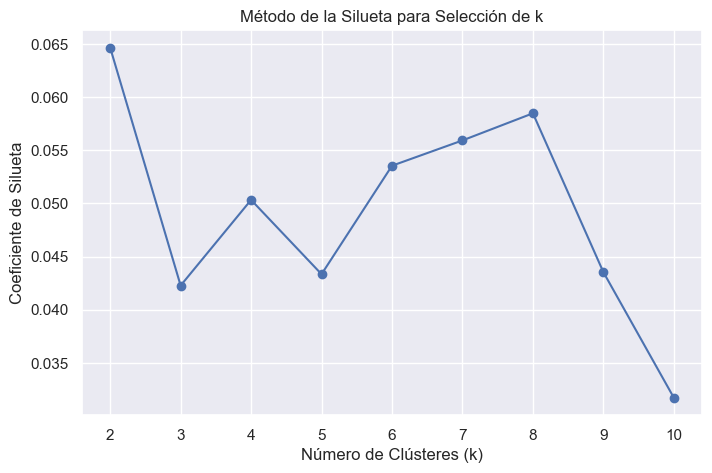

In [39]:
modelos.silhouette_method()

In [40]:
cluster = modelos.k_means(2)
len(cluster.labels_)

c:\Users\bcriv\miniconda3\envs\dydde\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


130

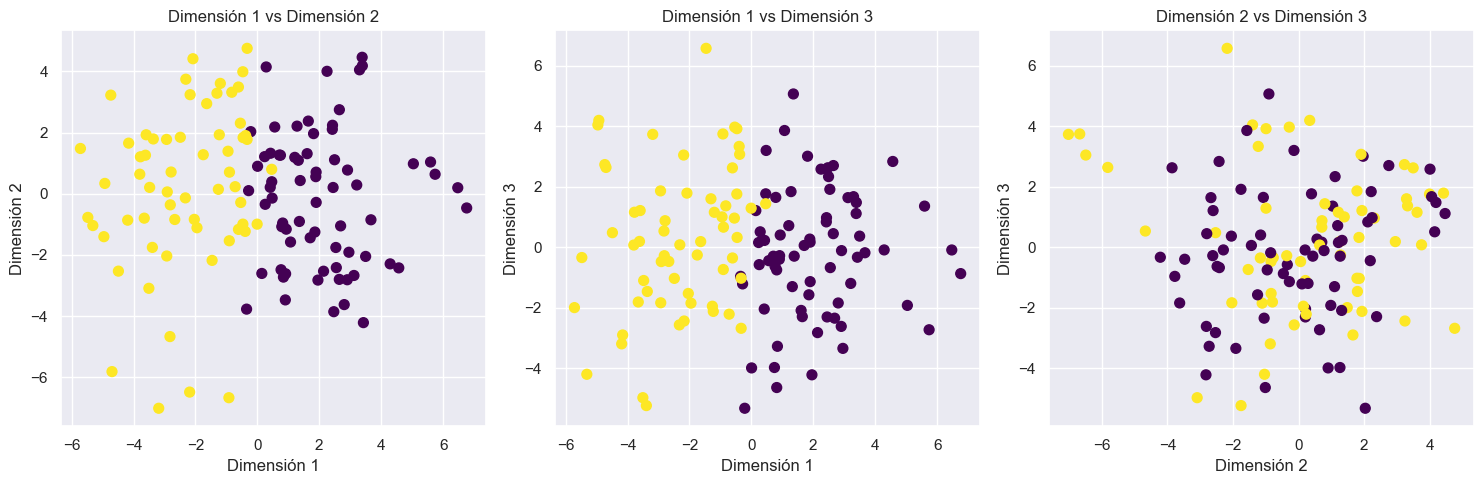

In [41]:
graficos.plot_column_combinations(modelos.componentes(),3, cluster.labels_)

In [46]:
datos_gru_1 = datos_gru_1.loc[datos_gru_1['Comentarios']!= '']
datos_gru_1['grupo'] = cluster.labels_

In [49]:
datos_gru_1[datos_gru_1['grupo']==0]['Comentarios'].shape[0] # 4 comentarios

69

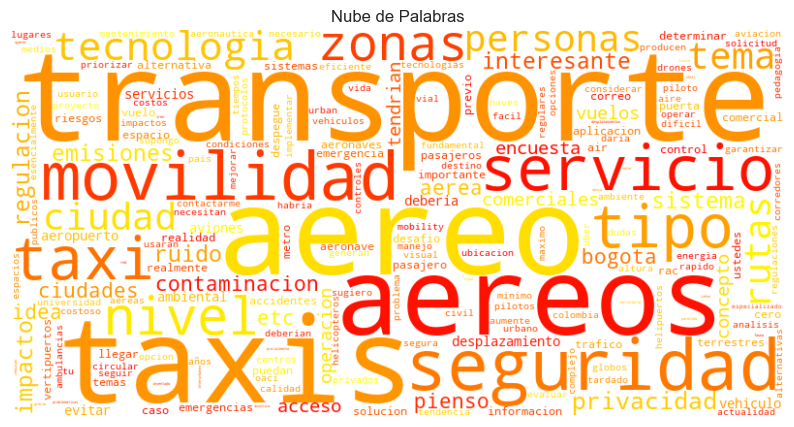

In [50]:
graficos.generar_wordcloud(limpieza_regex.stop_words(data,datos_gru_1[datos_gru_1['grupo']==0]['Comentarios']),"autumn")

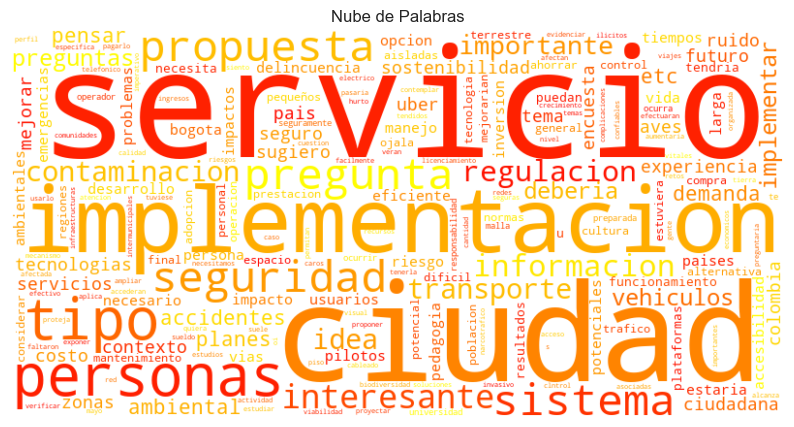

In [52]:
graficos.generar_wordcloud(limpieza_regex.stop_words(data,datos_gru_1[datos_gru_1['grupo']==1]['Comentarios']),"autumn")